<h1> <Center> <u> Investment Analysis for Spark Funds </u> </Center> </h1>

## Checkpoint 1: Data Cleaning 

In [1]:
import pandas as pd
companies = pd.read_csv('companies.csv', encoding= 'unicode_escape')
rounds2 = pd.read_csv('rounds2.csv', encoding= 'unicode_escape')

In [2]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
#Finding number of records in companies Dataframe
companies.shape

(66368, 10)

In [4]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
#Finding number of records in rounds2 Dataframe
rounds2.shape

(114949, 6)

In [6]:
#Sorting the values in both Data Frames and replacing the column name 'permalink' in companies to 'company_permalink' to make similar to the 'company_permalink' in rounds2 as both contains same type of data
companies.sort_index(inplace = True)
rounds2.sort_index(inplace = True)
companies.rename(columns = {"permalink": 'company_permalink'}, inplace = True)

In [7]:
#Both Dataframes still contains non-ASCII characters especially in permalink, which should be treated as the unique ID 
# of Dataframes. Hence trying to encode and decode the column using UTF-8.
companies["company_permalink"] = companies["company_permalink"].str.encode('utf-8').str.decode('ascii','ignore')
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('utf-8').str.decode('ascii','ignore')
#Making all characters into lowercase to make it easier to find unique values
companies["company_permalink"] = companies["company_permalink"].str.lower()
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()

In [8]:
companies.head()

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [9]:
# Finding the number of unique values in companies dataset
b = companies['company_permalink'].unique()
len(b)

66368

In [10]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [11]:
# Finding the number of unique values in rounds2 dataset
a = rounds2['company_permalink'].unique()
len(a)

66368

In [12]:
# Checking whether there are any companies in the rounds2 file which are not  present in companies ? 
comparison = (rounds2['company_permalink'].unique())==((companies["company_permalink"].unique()))
comparison.all()

True

In [13]:
#Merging the datasets on the unique ID column 'company_permalink'
master_frame = pd.merge(companies, rounds2, on='company_permalink', how='inner')
master_frame

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [14]:
#Sorting the dataframe on Unique ID 'company_permalink'
master_frame.sort_values('company_permalink', inplace = True)

Before doing any analysis missing values evaluation and other data cleaning must be done in the data, so as to ensure accuracy of the results obtained.

In [15]:
#Checking for missing values
master_frame.isna().sum()

company_permalink              0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

There are 19990 missing values in raised_amount_usd. Since, raised amount is the field we targeting, those records which doesn't have missing values in this column are not useful.

In [16]:
#Dropping records with missing values in raised_amount_usd
master_frame.dropna(axis=0, subset=['raised_amount_usd'], inplace = True)

In [17]:
#Dropping investment types that are not part of analysis
fund_type = ['angel','private_equity','seed','venture']
master_frame = master_frame[master_frame['funding_round_type'].isin(fund_type)]

In [18]:
#, Dropping columns that are not relevent to analysis
master_frame = master_frame.drop(['status','homepage_url','state_code','region','city','founded_at','funding_round_permalink','funding_round_code','funded_at'], axis =1)

In [19]:
#Finding the missing value in name column
master_frame[master_frame.name.isnull()]

,company_permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
98692,/organization/tell-it-in,NaN,Startups,USA,seed,25000.0


In [20]:
#Addressing the missing value in name column
master_frame.name.fillna('Tell It In', inplace = True)

In [21]:
#Converting raised_amount_usd to millions and changing the column name
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
master_frame = master_frame.rename(columns = {'raised_amount_usd':'raised_amount_millions_usd'})

## Checkpoint 2: Funding Type Analysis

In [22]:
#Creating a grouped data frame based on funding type
fund_grouped = master_frame.groupby('funding_round_type')

In [23]:
#Understanding the statistics of data in different funding types
fund_grouped['raised_amount_millions_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4860.0,0.958694,7.404397,0.0,0.150000,0.400,1.0,494.511992
private_equity,1936.0,73.308593,198.113458,0.0,5.000000,20.000,75.0,4745.460219
seed,23603.0,0.719818,2.221733,0.0,0.055000,0.275,1.0,200.000000
venture,50228.0,11.748949,86.352067,0.0,1.600902,5.000,12.0,17600.000000


In [24]:
#Checking the skewness of data to decide on the suitable summary measure.
skew = pd.DataFrame(fund_grouped.raised_amount_millions_usd.skew())
skew = skew.rename(columns = {'raised_amount_millions_usd':'skewness'})
skew

,skewness
funding_round_type,
angel,61.316046
private_equity,12.042263
seed,49.447366
venture,172.098000


Since all funding types have positively skewed data, summary statstics like median and mode will be more representative of the dataset than mean.

In [25]:
#Checking the median
median = pd.DataFrame(fund_grouped.raised_amount_millions_usd.median())
median = median.rename(columns = {'raised_amount_millions_usd':'Median'})
median

,Median
funding_round_type,
angel,0.400
private_equity,20.000
seed,0.275
venture,5.000


In [26]:
#Checking the mode
mode = pd.DataFrame(fund_grouped.raised_amount_millions_usd.agg(pd.Series.mode))
mode = mode.rename(columns = {'raised_amount_millions_usd':'Mode'})
mode

,Mode
funding_round_type,
angel,0.5
private_equity,100.0
seed,1.0
venture,10.0


After analysing different summary measures both <b>Medain</b> and <b>Mode</b> seem to best represent the data of investment amount in eact funding type, hence taking them for analysis.

As Spark Funds is interested to invest between 5-15 Millions of USD, the only funding type that's suitale for the investement given the constraint is <b>Venture</b>

## Checkpoint 3:  Country Analysis

In [27]:
# There are 4635 records which don't have specified country code, hence we can drop those records.
master_frame.dropna(axis=0, subset=['country_code'], inplace = True)

In [28]:
#The top nine countries with highest total funding across all sectures in Venture investment type
top9 = master_frame[master_frame['funding_round_type'] == 'venture'].groupby('country_code').sum()
top9 = top9.sort_values(by = 'raised_amount_millions_usd', ascending = False).head(9)
top9

,raised_amount_millions_usd
country_code,
USA,422510.842796
CHN,39835.418773
GBR,20245.627416
IND,14391.858718
CAN,9583.332317
FRA,7259.536732
ISR,6907.514579
DEU,6346.959822
JPN,3363.676611


## Checkpoint 4: Sector Analysis 1

In [29]:
#extracting primary sector from master_frame
master_frame['primary_sector'] = master_frame.loc[:,'category_list'].str.split('|').str[0]
master_frame

,company_permalink,name,category_list,country_code,funding_round_type,raised_amount_millions_usd,primary_sector
0,/organization/-fame,#fame,Media,IND,venture,10.000000,Media
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,0.700000,Application Platforms
4,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2.000000,Curated Web
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,seed,0.043360,Biotechnology
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,venture,0.719491,Biotechnology
...,...,...,...,...,...,...,...
114940,/organization/zzish,Zzish,Analytics|Android|Developer APIs|Education|Gam...,GBR,seed,0.320000,Analytics
114941,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,Enterprise Software,CHN,venture,1.587301,Enterprise Software
114942,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,0.007000,Advertising
114943,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,0.033149,Advertising


To Check whether the extraction is done in the right way, fin

In [30]:
# Unique values of categories in master_frame
c = master_frame.primary_sector.unique()
len(c)

696

In [31]:
mapping = pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [32]:
#EDA and Pre-Processing of the data
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [33]:
#Removing missing values and sorting the data
mapping.dropna(inplace = True)
mapping.sort_values(by = 'category_list', inplace = True)

In [34]:
#Found that in many places the string 'na' in the category name is currently replaced with the number 0.
#So making necessary replacements to correct this mistake.
mapping['category_list'] = mapping['category_list'].str.replace('0','na')

In [35]:
#Unique values of categories in the mapping data frame
d = mapping.category_list.unique()
len(d)

687

In [36]:
#Getting the column names of mapping dataframe
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [37]:
#Converging multiple columns of main sector values with 1,0 as values in them to to one variable column and one value column
mapping = pd.melt(mapping, id_vars=['category_list'], value_vars = ['Automotive & Sports', 'Blanks','Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others','Social, Finance, Analytics, Advertising'])
mapping.head()

,category_list,variable,value
0,nanotechnology,Automotive & Sports,0
1,natural Language Processing,Automotive & Sports,0
2,natural Resources,Automotive & Sports,0
3,navigation,Automotive & Sports,0
4,3D,Automotive & Sports,0


In [38]:
#dropping all the rows 
mapping = mapping[~(mapping['value'] == 0)]

In [39]:
#dropping the value column and renaming variable as main_sector
mapping = mapping.drop('value', axis =1)
mapping = mapping.rename(columns = {'variable':'main_sector', "category_list": "primary_sector"})
mapping

,primary_sector,main_sector
12,Adventure Travel,Automotive & Sports
18,Aerospace,Automotive & Sports
48,Auto,Automotive & Sports
49,Automated Kiosk,Automotive & Sports
50,Automotive,Automotive & Sports
...,...,...
6108,Social Recruiting,"Social, Finance, Analytics, Advertising"
6109,Social Television,"Social, Finance, Analytics, Advertising"
6110,Social Travel,"Social, Finance, Analytics, Advertising"
6121,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [40]:
#Dropping category_list as it is not needed any more.
master_frame = master_frame.drop('category_list', axis =1)

In [41]:
#Adding the mapping data to the master_frame
master_frame = pd.merge(master_frame, mapping, how = 'inner', on = 'primary_sector')
master_frame

,company_permalink,name,country_code,funding_round_type,raised_amount_millions_usd,primary_sector,main_sector
0,/organization/-fame,#fame,IND,venture,10.000000,Media,Entertainment
1,/organization/90min,90min,GBR,venture,15.000000,Media,Entertainment
2,/organization/90min,90min,GBR,venture,5.800000,Media,Entertainment
3,/organization/90min,90min,GBR,venture,18.000000,Media,Entertainment
4,/organization/akira-mobile,Akira Mobile,LTU,seed,0.018410,Media,Entertainment
...,...,...,...,...,...,...,...
74854,/organization/wiselike,Wiselike,USA,seed,1.250000,Q&A,"News, Search and Messaging"
74855,/organization/yes-no,yes.no,ISR,seed,1.000000,Q&A,"News, Search and Messaging"
74856,/organization/youcruit,Youcruit,SWE,angel,0.447037,Micro-Enterprises,Others
74857,/organization/yunnan-landsun-green-industry-gr...,Yunnan Landsun Green Industry (Group),CHN,venture,7.227332,Tea,Others


## Checkpoint 5: Sector Analysis 2

<b>Country_1 = USA, Country_2 = GBR, Country_3 = IND, FT= Venture</b>

In [42]:
D1 = master_frame[(master_frame['funding_round_type'] == 'venture') & (master_frame['country_code'] == 'USA') & (master_frame['raised_amount_millions_usd'] >= 5) & (master_frame['raised_amount_millions_usd'] <= 15)]
D1.head()

,company_permalink,name,country_code,funding_round_type,raised_amount_millions_usd,primary_sector,main_sector
6,/organization/all-def-digital,All Def Digital,USA,venture,5.0,Media,Entertainment
24,/organization/chefs-feed,ChefsFeed,USA,venture,5.0,Media,Entertainment
43,/organization/huffingtonpost,The Huffington Post,USA,venture,5.0,Media,Entertainment
44,/organization/huffingtonpost,The Huffington Post,USA,venture,5.0,Media,Entertainment
58,/organization/matchmine,MatchMine,USA,venture,10.0,Media,Entertainment


In [43]:
#Counting number of investments in the dataset
D1.shape

(12012, 7)

In [44]:
#Total amount of investment made
D1.raised_amount_millions_usd.sum()

107318.29466399999

In [45]:
#Doing sector analysis to find top sectors by number of inverstments
D1['main_sector'].value_counts()

Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
News, Search and Messaging                 1582
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: main_sector, dtype: int64

In [46]:
#Finding the companies with highest investment amount in top sector
D1[D1['main_sector']== 'Others' ].groupby('name').sum().sort_values(by =["raised_amount_millions_usd"], ascending = False).head()

,raised_amount_millions_usd
name,
Virtustream,64.300000
Capella Photonics,54.968051
AirTight Networks,54.201907
deCarta,52.100000
Black Duck Software,51.000000


In [47]:
#Finding the companies with highest investment amount in second-top sector
D1[D1['main_sector']== 'Social, Finance, Analytics, Advertising' ].groupby('name').sum().sort_values(by = "raised_amount_millions_usd", ascending = False).head()

,raised_amount_millions_usd
name,
SST Inc. (Formerly ShotSpotter),67.933006
Demandbase,63.000000
Intacct,61.800000
NetBase Solutions,60.600000
Lotame,59.700000


In [48]:
D2 = master_frame[(master_frame['funding_round_type'] == 'venture') & (master_frame['country_code'] == 'GBR') & (master_frame['raised_amount_millions_usd'] >= 5) & (master_frame['raised_amount_millions_usd'] <= 15)]
D2.head()

,company_permalink,name,country_code,funding_round_type,raised_amount_millions_usd,primary_sector,main_sector
1,/organization/90min,90min,GBR,venture,15.00,Media,Entertainment
2,/organization/90min,90min,GBR,venture,5.80,Media,Entertainment
163,/organization/common-interest-communities,Common Interest Communities,GBR,venture,10.00,Application Platforms,"News, Search and Messaging"
194,/organization/geospock-ltd-,GeoSpock Ltd.,GBR,venture,5.46,Application Platforms,"News, Search and Messaging"
195,/organization/geospock-ltd-,GeoSpock Ltd.,GBR,venture,5.40,Application Platforms,"News, Search and Messaging"


In [49]:
#Counting number of investments in the dataset
D2.shape

(619, 7)

In [50]:
#Total amount of investment made
D2.raised_amount_millions_usd.sum()

5365.228300000001

In [51]:
#Doing sector analysis to find top sectors by number of inverstments
D2['main_sector'].value_counts()

Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: main_sector, dtype: int64

In [52]:
#Finding the companies with highest investment amount in top sector
D2[D2['main_sector']== 'Others' ].groupby('name').sum().sort_values(by = "raised_amount_millions_usd", ascending = False).head()

,raised_amount_millions_usd
name,
Electric Cloud,37.000000
SenSage,36.250000
Enigmatec,32.500000
SilverRail Technologies,29.000000
OpenCloud,27.972766


In [53]:
#Finding the companies with highest investment amount in second-top sector
D2[D2['main_sector']== 'Social, Finance, Analytics, Advertising' ].groupby('name').sum().sort_values(by = "raised_amount_millions_usd", ascending = False).head()

,raised_amount_millions_usd
name,
Celltick Technologies,37.500000
myThings,34.000000
Zopa,32.900000
VisualDNA,28.550000
MarketInvoice,25.553007


In [54]:
D3 = master_frame[(master_frame['funding_round_type'] == 'venture') & (master_frame['country_code'] == 'IND') & (master_frame['raised_amount_millions_usd'] >= 5) & (master_frame['raised_amount_millions_usd'] <= 15)]
D3.head()

,company_permalink,name,country_code,funding_round_type,raised_amount_millions_usd,primary_sector,main_sector
0,/organization/-fame,#fame,IND,venture,10.00,Media,Entertainment
447,/organization/babajob,Babajob,IND,venture,10.00,Curated Web,"News, Search and Messaging"
488,/organization/bharat-matrimony,Bharat Matrimony,IND,venture,11.75,Curated Web,"News, Search and Messaging"
532,/organization/bluestone-com,Bluestone.com,IND,venture,5.00,Curated Web,"News, Search and Messaging"
534,/organization/bluestone-com,Bluestone.com,IND,venture,10.00,Curated Web,"News, Search and Messaging"


In [55]:
#Counting number of investments in the dataset
D3.shape

(328, 7)

In [56]:
#Total amount of investment made
D3.raised_amount_millions_usd.sum()

2949.5436019999997

In [57]:
#Doing sector analysis to find top sectors by number of inverstments
D3['main_sector'].value_counts()

Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: main_sector, dtype: int64

In [58]:
#Finding the companies with highest investment amount in top sector
D3[D3['main_sector']== 'Others' ].groupby('name').sum().sort_values(by = "raised_amount_millions_usd", ascending = False).head()

,raised_amount_millions_usd
name,
FirstCry.com,39.0
Myntra,38.0
CommonFloor,32.9
Pepperfry.com,28.0
ItzCash Card Ltd.,25.0


In [59]:
#Finding the companies with highest investment amount in second-top sector
D3[D3['main_sector']== 'Social, Finance, Analytics, Advertising' ].groupby('name').sum().sort_values(by = "raised_amount_millions_usd", ascending = False).head()

,raised_amount_millions_usd
name,
Manthan Systems,50.70000
Komli Media,28.00000
ShopClues.com,25.00000
inTarvo,21.90000
Grameen Financial Services,21.55605


## Checkpoint 6: Plots

In [60]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np

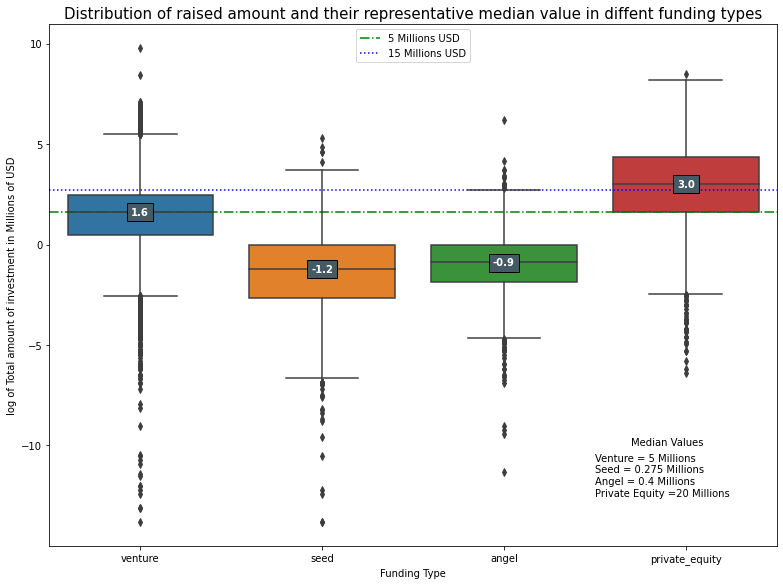

In [61]:
y = np.log(master_frame["raised_amount_millions_usd"])
plt.figure(figsize=[11,8])
box_plot = sns.boxplot(master_frame["funding_round_type"],y)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(cat,y, f'{y}', ha='center',va='center',fontweight='bold', size=10, color='white',bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()
start = np.log(5)
stop = np.log(15)
plt.hlines(start, -0.5, 3.5, linestyles = 'dashdot', colors = 'g', label = '5 Millions USD')
plt.hlines(stop, -0.5, 3.5,  linestyles = 'dotted', colors = 'b', label = '15 Millions USD')
plt.legend(loc = 'upper center')
plt.xlabel('Funding Type')
plt.ylabel('log of Total amount of investment in Millions of USD')
plt.title('Distribution of raised amount and their representative median value in diffent funding types',  fontsize=15)
plt.text(2.7,-10,'Median Values' )
plt.text(2.5,-12.5, 'Venture = 5 Millions \nSeed = 0.275 Millions \nAngel = 0.4 Millions \nPrivate Equity =20 Millions')
plt.show()

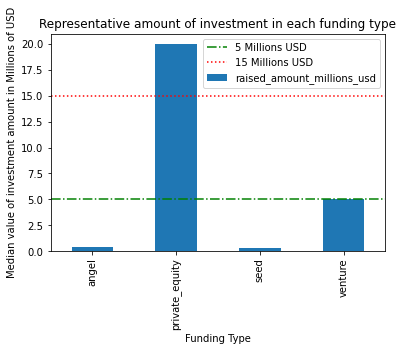

In [62]:
# Creating a bar plot showing the representative amount of investment in different funding types
master_frame.groupby(['funding_round_type'])['raised_amount_millions_usd'].median().plot.bar()
plt.ylabel('Median value of investment amount in Millions of USD')
plt.xlabel('Funding Type')
plt.title('Representative amount of investment in each funding type')
plt.hlines(5, -0.5, 3.5, linestyles = 'dashdot', colors = 'g', label = '5 Millions USD')
plt.hlines(15, -0.5, 3.5,  linestyles = 'dotted', colors = 'r', label = '15 Millions USD')
plt.legend(loc = 'upper right')
plt.show()

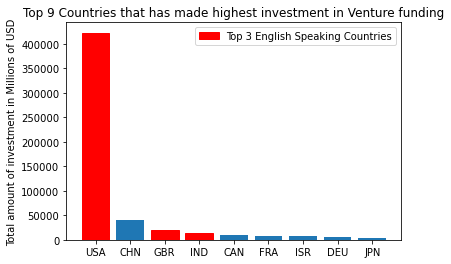

In [63]:
# Creating a bar plot showing Top 9 Countries that has made highest investment in Venture funding type
labels = top9.index
relevant_bars = ['USA','GBR', 'IND']
bars = plt.bar(labels,top9['raised_amount_millions_usd'])
for i in range(len(bars)):
    if labels[i] in relevant_bars:
        bars[i].set_color('red')
legend = plt.legend(['Top 3 English Speaking Countries'])
legend.get_patches()[0].set_color('r')
plt.ylabel('Total amount of investment in Millions of USD')
plt.title('Top 9 Countries that has made highest investment in Venture funding')
plt.show()

In [64]:
#Joining the three dataframe D1 D2 and D3 to get data of all top 3 English Speaking Countries
top3 = pd.concat([D1, D2, D3], axis =0)
top3

,company_permalink,name,country_code,funding_round_type,raised_amount_millions_usd,primary_sector,main_sector
6,/organization/all-def-digital,All Def Digital,USA,venture,5.0,Media,Entertainment
24,/organization/chefs-feed,ChefsFeed,USA,venture,5.0,Media,Entertainment
43,/organization/huffingtonpost,The Huffington Post,USA,venture,5.0,Media,Entertainment
44,/organization/huffingtonpost,The Huffington Post,USA,venture,5.0,Media,Entertainment
58,/organization/matchmine,MatchMine,USA,venture,10.0,Media,Entertainment
...,...,...,...,...,...,...,...
73804,/organization/octro-2,Octro,IND,venture,15.0,Online Gaming,Entertainment
74125,/organization/easylink,EasyLink,IND,venture,5.4,Web Design,"News, Search and Messaging"
74338,/organization/livspace,Livspace,IND,venture,8.0,Interior Design,Entertainment
74551,/organization/holidayiq-com,HolidayIQ,IND,venture,15.0,Resorts,Entertainment


In [65]:
# Reshaping and changing data as per requirement to create the require plot
sect = pd.DataFrame(top3.groupby(['main_sector', 'country_code'])['company_permalink'].count())
sect = sect.rename(columns = {'company_permalink': 'Count'})
#Resetting index to convert all values to column
sect.reset_index(level=0, inplace=True)
sect.reset_index(level=0, inplace=True)
# Create Pivot table of  necessary data
sect = sect.pivot(index = 'main_sector', columns='country_code',values='Count')
sect

country_code,GBR,IND,USA
main_sector,,,
Automotive & Sports,16,13,167
Cleantech / Semiconductors,128,20,2300
Entertainment,56,33,591
Health,24,19,909
Manufacturing,42,21,799
"News, Search and Messaging",73,52,1582
Others,147,110,2950
"Social, Finance, Analytics, Advertising",133,60,2714


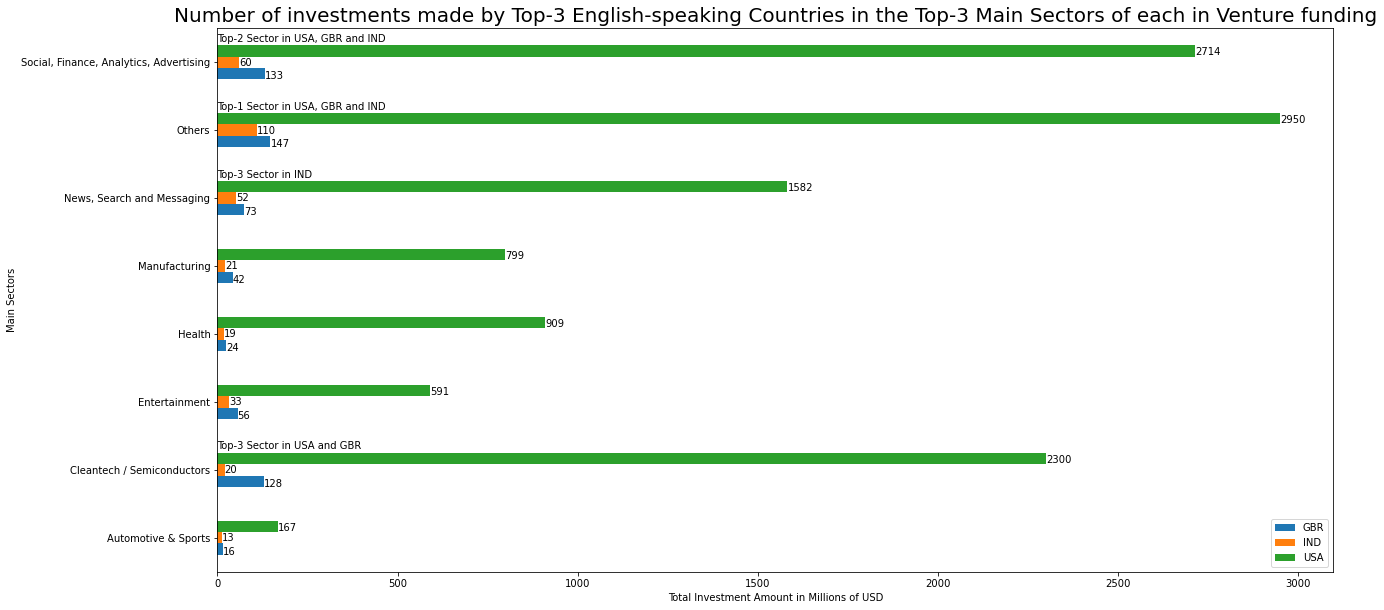

In [66]:
# Creating Bar plot of showing the number of investments in the top 3 sectors of the top 3 English speaking countries 
sect.plot(kind='barh', figsize=[20,10])
plt.legend(['GBR','IND','USA'], loc='lower right')
for index, value in enumerate(sect['GBR']) :
       plt. text(value, index-0.25, str(value))
for index, value in enumerate(sect['IND']) :
       plt. text(value, index-0.05, str(value))
for index, value in enumerate(sect['USA']) :
       plt. text(value, index+0.1, str(value))
plt.title('Number of investments made by Top-3 English-speaking Countries in the Top-3 Main Sectors of each in Venture funding', fontsize = 20)
plt.ylabel('Main Sectors')
plt.xlabel('Total Investment Amount in Millions of USD')
plt.text(0,6.3,'Top-1 Sector in USA, GBR and IND')
plt.text(0,7.3,'Top-2 Sector in USA, GBR and IND')
plt.text(0,5.3,'Top-3 Sector in IND')
plt.text(0,1.3,'Top-3 Sector in USA and GBR')
plt.show()